In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
transform = transforms.Compose([
    transforms.RandomAffine(degrees = 0, translate = (0.2, 0.2), scale=(0.9, 1.2)),
    transforms.ToTensor()]
)

In [3]:
device = torch.device('cuda')

In [4]:
train_data = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=False)
test_data = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=False)

In [5]:
# DataLoader
train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_data, batch_size=len(test_data), shuffle=True)

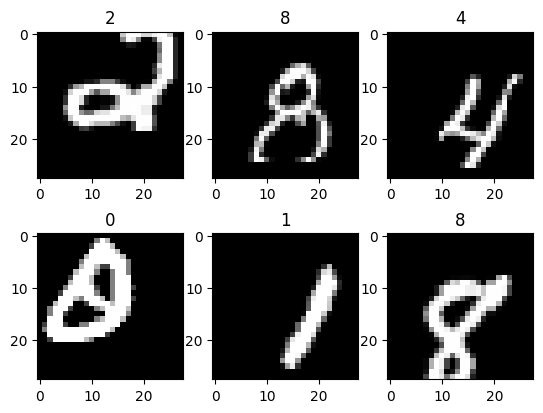

In [6]:
# Show samples
examples = iter(train_loader)
example_image, lable = next(examples)
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.title(lable[i].item())
    plt.imshow(example_image[i][0], cmap='gray')
plt.show()

In [7]:
example_image.shape

torch.Size([32, 1, 28, 28])

In [8]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels = 1, out_channels=32, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=5)
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5)
        self.fc1 = nn.Linear(3*3*64, 256)
        self.fc2 = nn.Linear(256, 10)
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.tanh(F.max_pool2d(self.conv2(x), 2))
        x = F.dropout(x, p=0.5, training=self.training)
        x = F.relu(F.max_pool2d(self.conv3(x),2))
        x = F.dropout(x, p=0.5, training=self.training)
        x = x.view(-1,3*3*64 )
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

In [9]:
cnn = CNN()
print(cnn)

CNN(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(32, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=10, bias=True)
)


In [10]:
loss_fn = nn.CrossEntropyLoss()
lr = 0.0001
optimizer = torch.optim.Adam(cnn.parameters(), lr = lr)

In [11]:
from sklearn.metrics import accuracy_score

In [ ]:
loss_list = []
accuracy_list = []
epochs = 15
for epoch in tqdm(range(epochs)):
    running_loss = 0
    train_dataiter = iter(train_loader)
    current_loss = 0
    for i, batch in enumerate(tqdm(train_dataiter)):
        X_batch, y_batch = batch
        optimizer.zero_grad()
        y_pred = cnn(X_batch)
        loss = loss_fn(y_pred, y_batch)
        loss.backward()
        optimizer.step()
        current_loss += loss
    loss_list.append(current_loss.item())
    test_dataiter = iter(test_loader)
    images, labels = next(test_dataiter)
    ac = accuracy_score(labels.numpy(), np.argmax(cnn.forward(images).detach().numpy(), axis = 1))
    print('accuracy:', ac)
    accuracy_list.append(ac)

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

accuracy: 0.7887


  0%|          | 0/1875 [00:00<?, ?it/s]

accuracy: 0.8729


  0%|          | 0/1875 [00:00<?, ?it/s]

accuracy: 0.9003


  0%|          | 0/1875 [00:00<?, ?it/s]

accuracy: 0.924


  0%|          | 0/1875 [00:00<?, ?it/s]

accuracy: 0.9307


  0%|          | 0/1875 [00:00<?, ?it/s]

accuracy: 0.9383


  0%|          | 0/1875 [00:00<?, ?it/s]

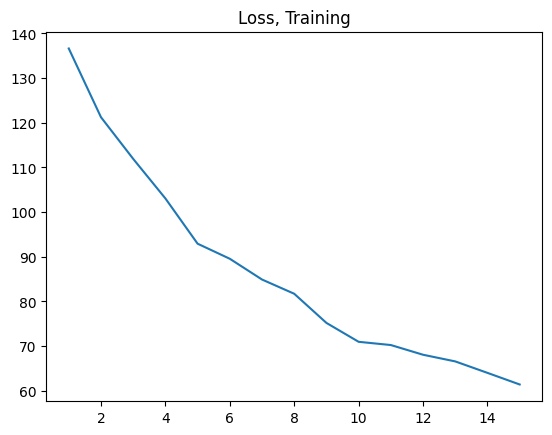

In [15]:
plt.plot(range(1, epochs+1), loss_list)
plt.title('Loss, Training')
plt.show()

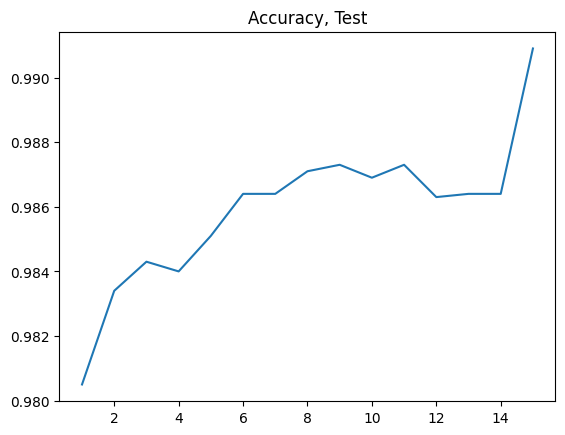

In [16]:
plt.plot(range(1, epochs+1), accuracy_list)
plt.title('Accuracy, Test')
plt.show()

In [20]:
import cv2
import urllib
import os
from PIL import Image

In [1]:
tensort = transforms.Compose([
    transforms.Resize((28, 28)),
    transforms.ToTensor()]
)
imgs_list = os.listdir('img')
labels = []
predictions = []
for i in imgs_list:
    labels.append(int(i[0]))
    f = open('img/'+i, 'r')
    name = f.read()
    resp = urllib.request.urlopen(name)
    image = np.asarray(bytearray(resp.read()), dtype="uint8")
    image = cv2.imdecode(image, cv2.IMREAD_GRAYSCALE)
    image = cv2.bitwise_not(image)
    im_pil = Image.fromarray(image)
    img = tensort(im_pil)
    predictions.append(np.argmax(cnn.forward(img).detach().numpy()))

NameError: name 'transforms' is not defined

In [33]:
from sklearn.metrics import accuracy_score

In [34]:
test = iter(test_loader)
images, labels = next(test)

In [36]:
images.shape

torch.Size([10000, 1, 28, 28])

In [68]:
accuracy_score(labels.numpy(), np.argmax(cnn.forward(images).detach().numpy(), axis = 1))

0.979

In [69]:
import pandas as pd

In [70]:
df = pd.read_csv('./kaggle/test.csv')
df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
array = df.to_numpy()
tensor = torch.from_numpy(array)
tensor = tensor.float()
tensor = tensor.reshape(28000, 1, 28, 28)

In [41]:
np.argmax(cnn.forward(tensor[0]).detach().numpy(), axis = 1)

array([2])

In [72]:
predictions = []
for i in range(28000):
    if i%1000 == 0:
        print(i)
    predictions.append(np.argmax(cnn.forward(tensor[i]).detach().numpy(), axis = 1).item())

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000


[2,
 0,
 8,
 6,
 3,
 8,
 0,
 3,
 0,
 3,
 5,
 2,
 4,
 0,
 9,
 3,
 3,
 8,
 8,
 0,
 9,
 8,
 7,
 6,
 7,
 4,
 2,
 7,
 4,
 7,
 2,
 8,
 4,
 2,
 6,
 2,
 8,
 5,
 8,
 6,
 2,
 8,
 4,
 9,
 8,
 7,
 8,
 2,
 6,
 2,
 6,
 8,
 8,
 3,
 8,
 2,
 0,
 2,
 8,
 8,
 4,
 1,
 2,
 0,
 0,
 0,
 8,
 8,
 0,
 1,
 6,
 8,
 8,
 8,
 2,
 8,
 8,
 9,
 2,
 3,
 5,
 4,
 1,
 0,
 8,
 2,
 4,
 3,
 6,
 7,
 2,
 0,
 6,
 6,
 1,
 4,
 3,
 9,
 8,
 4,
 0,
 8,
 2,
 0,
 4,
 3,
 0,
 5,
 0,
 8,
 0,
 0,
 4,
 2,
 6,
 7,
 1,
 8,
 3,
 3,
 3,
 9,
 2,
 8,
 6,
 3,
 8,
 8,
 7,
 4,
 3,
 8,
 6,
 0,
 0,
 0,
 3,
 1,
 3,
 6,
 4,
 3,
 4,
 5,
 5,
 8,
 2,
 4,
 2,
 8,
 4,
 3,
 5,
 6,
 5,
 3,
 7,
 5,
 8,
 8,
 3,
 0,
 4,
 5,
 1,
 2,
 8,
 6,
 3,
 0,
 2,
 7,
 8,
 6,
 1,
 3,
 7,
 4,
 8,
 2,
 4,
 8,
 5,
 2,
 4,
 9,
 2,
 1,
 6,
 0,
 6,
 1,
 4,
 9,
 6,
 0,
 9,
 7,
 0,
 9,
 6,
 8,
 0,
 8,
 9,
 0,
 8,
 4,
 4,
 2,
 0,
 9,
 3,
 6,
 3,
 2,
 6,
 6,
 3,
 4,
 2,
 3,
 8,
 2,
 2,
 0,
 4,
 6,
 8,
 0,
 0,
 4,
 9,
 1,
 7,
 2,
 2,
 3,
 8,
 6,
 8,
 6,
 2,
 8,
 5,
 5,
 4,
 8,
 3,
 5,


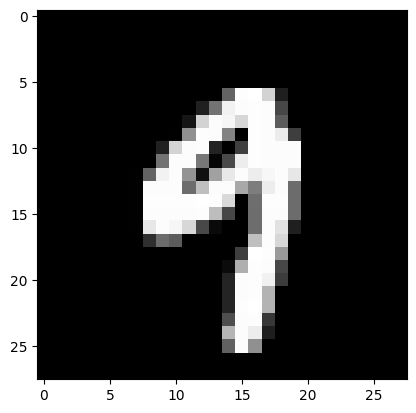

In [52]:
plt.imshow(tensor[27998].reshape(28, 28), cmap='gray')

In [53]:
submission = pd.DataFrame()
submission['ImageId'] = range(1, 28001)
submission['Label'] = predictions
submission
submission.to_csv('submission.csv', index=False)

In [54]:
df = pd.read_csv('submission.csv')
df

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9
